In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
import pickle

### Visualization of the Dataset

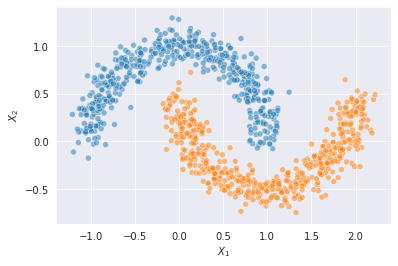

In [3]:
sns.set_style("darkgrid")
 
n_samples = 1000
n_noisy_dimensions = 1000

X, y = datasets.make_moons(n_samples=n_samples, noise=0.1)
X = (X).astype(np.float32)

# Scatter plot, dots colored by class value
df = pd.DataFrame(data = {"x": X[:,0], "y": X[:,1], "category": y})
sns.scatterplot(
    x="x",
    y="y",
    data=df,
    hue="category",
    legend=False,
    alpha=0.5
)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.savefig("two_moons.png")

### Visualization of our Results

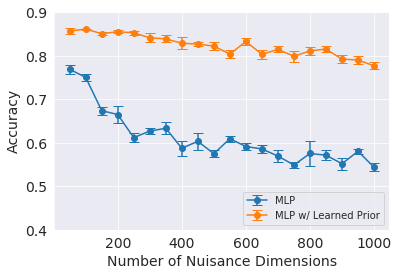

In [30]:
two_moons_results_dir = "./two_moons_results"

accuracies_no_prior = pickle.load(open("{}/no_prior_mean_losses.p".format(two_moons_results_dir), "rb"))
accuracies_with_prior = pickle.load(open("{}/with_prior_mean_losses.p".format(two_moons_results_dir), "rb"))

se_no_prior = pickle.load(open("{}/no_prior_loss_std.p".format(two_moons_results_dir), "rb"))
se_with_prior = pickle.load(open("{}/with_prior_loss_std.p".format(two_moons_results_dir), "rb"))

nuisance_dim_values = [x for x in range(50, 1000+1, 50)]
sns.set_style("darkgrid")
plt.errorbar(nuisance_dim_values, accuracies_no_prior, yerr=se_no_prior, label="MLP", marker='o', capsize=5)
plt.errorbar(nuisance_dim_values, accuracies_with_prior, yerr=se_with_prior, label="MLP w/ Learned Prior", marker='o', capsize=5)
plt.xlabel("Number of Nuisance Dimensions", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.4, 0.9)


plt.legend(loc="lower right")
plt.show()